# Computer Vision 1

## CLASE 3

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)

## Comentarios sobre el estado del documento



## Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
 
import numpy as np

import cv2 as cv

%matplotlib inline

## Para la imagen suministrada “metal grid”. Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo
3. Marque con color las direcciones de gradientes más altos

In [2]:
images_list = ['./Imagenes/' +img for img in os.listdir(path='./Imagenes')]
print(images_list)

grid_path = images_list[3]
web_path = images_list[4]
general = images_list[8]



['./Imagenes/CoordCrom_1.png', './Imagenes/CoordCrom_2.png', './Imagenes/CoordCrom_3.png', './Imagenes/metalgrid.jpg', './Imagenes/tela2.jpg', './Imagenes/test_blue.png', './Imagenes/test_green.png', './Imagenes/test_red.png', './Imagenes/WhatsApp Image 2020-09-15 at 19.16.38.jpeg', './Imagenes/WP_B.png', './Imagenes/WP_O.png', './Imagenes/WP_R.png']


In [3]:
image_grid = cv.imread(grid_path)
image_grid = cv.cvtColor(image_grid, cv.COLOR_BGR2GRAY)
# Le paso un suavizado gaussiano para que el ruido no influya 
# en el cálculo de los gradientes
image_grid = cv.GaussianBlur(image_grid,(3,3),0,0)


## Prueba de gradiente y módulo utilizando filtro LoG

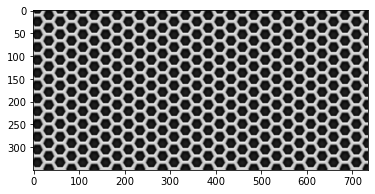

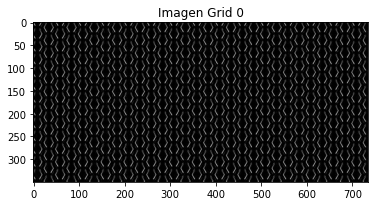

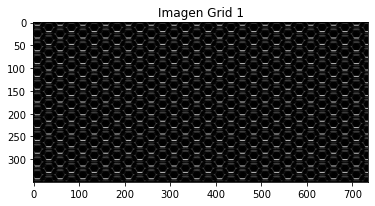

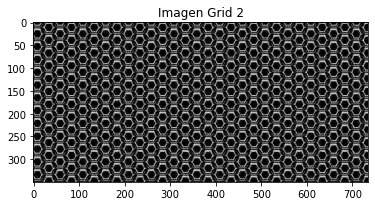

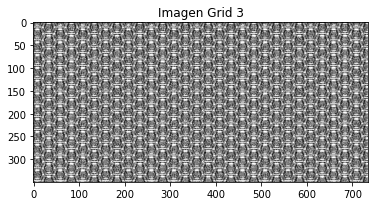

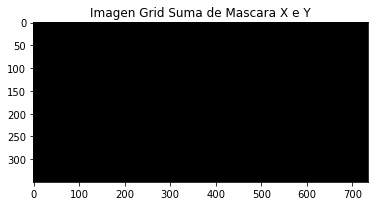

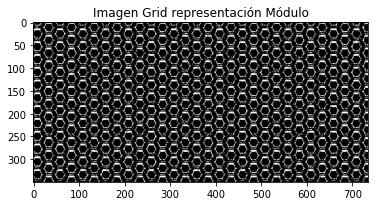

In [12]:
plt.imshow(image_grid, cmap='gray')

# definimos los kernels
kX = np.array([1, -2, 1])
kY = np.array([1, -2, 1])
uni = np.array([0, 1, 0])
 
# gradiente de la imagen en X e Y: Laplaciano del Gaussiano
grid_grad_x = cv.sepFilter2D(image_grid, -1, kX, uni)
grid_grad_y = cv.sepFilter2D(image_grid, -1, uni, kY )

grid_grad_module = (grid_grad_x**2 + grid_grad_y**2) ** 0.5
grid_grad_angle = np.arctan((grid_grad_y+ 0.0000001) / (grid_grad_x + 0.0000001) )

grids = [grid_grad_x, grid_grad_y, grid_grad_module, grid_grad_angle]

for i, grid in enumerate(grids):
    plt.figure(i)
    plt.title(f'Imagen Grid {i}')
    plt.imshow(grid, cmap='gray')
    plt.show()

## Realizo una prueba: Binarizo los bordes de las imagenes filtradas (con un threshold) y las sumo. 

threshold = 50

mask_x = (grid_grad_x > threshold) * 255
mask_y = (grid_grad_y > threshold) * 255

module_threshold = np.quantile(grid_grad_module.flatten(), 0.80)
mask_module = (grid_grad_module > module_threshold)* 255

mask = cv.add(mask_x.astype(np.uint8), mask_y.astype(np.uint8))

plt.figure(4)
plt.title(f'Imagen Grid Suma de Mascara X e Y')
plt.imshow(mask, cmap='gray')
plt.show()

plt.figure(5)
plt.title(f'Imagen Grid representación Módulo')
plt.imshow(mask_module, cmap='gray')
plt.show()

### Observaciones

#### 1) Filtros direccionales (Gx, Gy)
Ambos kernels lograron la detección de bordes. Dada la geometría de los hexagonos, en el Gx no de detectaron los bordes horizontales (lógico, dado que la variacion de color en dirección x no existirá en ese borde). Por esta misma razón, se detectaron mejor los bordes en el Gy. No había partes de la geometría de las figuras que sean estrictamente verticales. 

#### 2) Módulo
El módulo no logra identificar correctamente los bordes.

#### 3) Ángulo
La imagen del ángulo muestra resultados curiosos: se observan hexágonos /rombos grices que no siguen la geometría de los hexágonos de la imagen original, sino que se comportan como líneas que atraviezan perpendicularmente los lados de los hexágonos.

Es decir, se forman figuras que corresponden a patrones dentro de la imagen que tienen el mísmo ángulo.

## Prueba del gradiente aplicando filtro de sobel

El filtro de sobel es un filtro direccional. Es particularmente bueno para identificar los bordes en imagenes. Esto se debe a que identifica y realza las variaciones en los colores direccionales en la periferia de cada píxel. Está formado por dos kernels, Gx, y Gy. 

La expresión de Gx está dada por:
    $ \begin{pmatrix} 1 \\ 2 \\  1 \end{pmatrix} *  \begin{pmatrix} 1 & 0 & −1 \end{pmatrix} = 
    \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{pmatrix} $

La expresión de Gy está dada por:
    $\begin{pmatrix} 1 \\ 0 \\ −1 \end{pmatrix} * \begin{pmatrix} 1 & 2 &  1 \end{pmatrix} = 
    \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{pmatrix}^T $



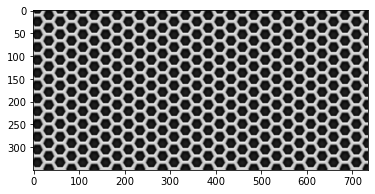

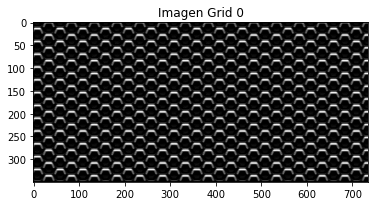

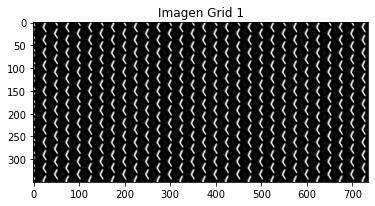

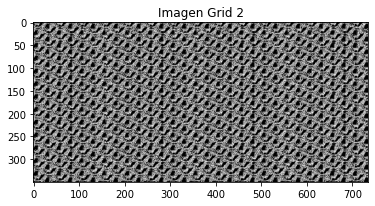

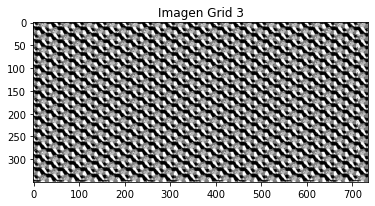

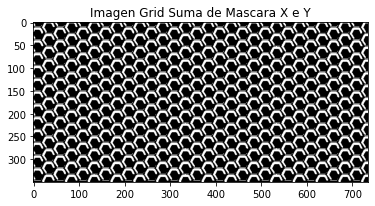

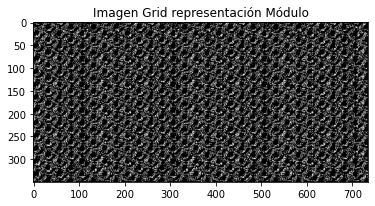

In [13]:
plt.imshow(image_grid, cmap='gray')

# definimos los kernels
k1 = np.array([1, 2, 1])
k2 = np.array([1, 0, -1])

 
# gradiente de la imagen en X e Y: Laplaciano del Gaussiano
grid_grad_x = cv.sepFilter2D(image_grid, -1, k1, k2)
grid_grad_y = cv.sepFilter2D(image_grid, -1, k2, k1 )

grid_grad_module = (grid_grad_x**2 + grid_grad_y**2) ** 0.5
grid_grad_angle = np.arctan((grid_grad_y + 0.0000001) / (grid_grad_x + 0.0000001) )

grids = [grid_grad_x, grid_grad_y, grid_grad_module, grid_grad_angle]

for i, grid in enumerate(grids):
    plt.figure(i)
    plt.title(f'Imagen Grid {i}')
    plt.imshow(grid, cmap='gray')
    plt.show()

## Realizo una prueba: Binarizo los bordes de las imagenes filtradas (con un threshold) y las sumo. 

threshold = 50


module_threshold = np.quantile(grid_grad_module.flatten(), 0.80)
mask_module = (grid_grad_module > module_threshold)* 255


mask_x = (grid_grad_x > threshold) * 255
mask_y = (grid_grad_y > threshold) * 255

mask = cv.add(mask_x.astype(np.uint8), mask_y.astype(np.uint8))

plt.figure(4)
plt.title(f'Imagen Grid Suma de Mascara X e Y')
plt.imshow(mask, cmap='gray')
plt.show()


plt.figure(5)
plt.title(f'Imagen Grid representación Módulo')
plt.imshow(mask_module, cmap='gray')
plt.show()

### Observaciones

Las imágenes procesadas con el filtro Sobel arrojan resultados similares al LoG. Se puede ver mayor intensidad y grosor en los bordes de Gx y Gy, probablemente porque el filtro sobel tiene más en cuenta el aporte de los píxeles en las diagonales del kernel.

Es de especial interés el resultado arrojado en la representación del ángulo. Esta figura representó con gran exactitud no solo la geometría de la imagen original, sino también la textura.

## Aplicación del filtro Canny para la detección de bordes y comparación con otros filtros



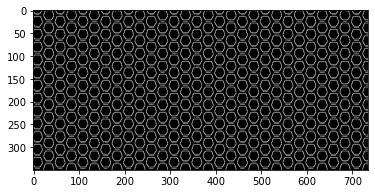

In [14]:
# Aplicación del filtro de Canny

filtro_canny = cv.Canny(image_grid, 100, 100, L2gradient=True)

plt.imshow(filtro_canny, cmap='gray')

plt.show()

### Observaciones

Eo filtro canny reconoció los bordes de los hexágonos, pero deformó la figura. Esto se debe producir por el efecto de "blurring" propio del algoritmo. La suavización de la imagen en vez de reducir el ruido en éste caso, genera la pérdida de los vértices. Por esta razón, se ven "ovalos"  en vez de hexágonos.

## Just for fun

Uno de mis Hnos está cursando historia económica argentina. Dio con una imagen de un periódico antiguo, donde la imagen presenta ruido producido por la impresión. 

Me pareció entretenido evaluar si con las técnicas aprendidas se podría mejorar la calidad de la imagen recibida.

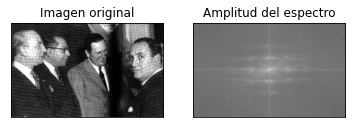

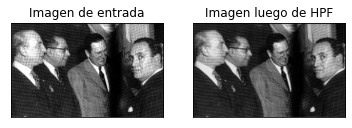

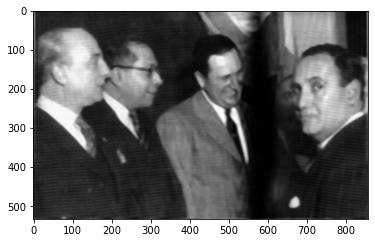

In [15]:
image_general = cv.imread(general)
image_general = cv.cvtColor(image_general, cv.COLOR_BGR2GRAY)

# Calculamos la FFT
dft = cv.dft(np.float32(image_general),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    

# Graficamos

plt.figure(1)

ax1=plt.subplot(121)
ax1.imshow(image_general, cmap = 'gray')
ax1.set_title('Imagen original'), plt.xticks([]), plt.yticks([])
ax2=plt.subplot(122)
ax2.imshow(magnitude_spectrum, cmap = 'gray')
ax2.set_title('Amplitud del espectro'), plt.xticks([]), plt.yticks([])
plt.show()

dim_cuadrado = 70

rows, cols = image_general.shape
crow,ccol = np.int_(rows/2), np.int_(cols/2)
# Primero crear la máscara, escalón centrado con 1, resto en cero (esto es un pasabajos)
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-dim_cuadrado:crow+dim_cuadrado, ccol-dim_cuadrado:ccol+dim_cuadrado] = 1

fshift = dft_shift*mask

f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.figure(2)

img_back = ((img_back - img_back.min())/img_back.max()) * 255

plt.subplot(121),plt.imshow(image_general, cmap = 'gray')
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Imagen luego de HPF'), plt.xticks([]), plt.yticks([])
plt.show()

median = cv.medianBlur(img_back.astype(np.uint8), 9)
plt.imshow(median, cmap = 'gray')
